In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

from sklearn.naive_bayes import GaussianNB

In [5]:
#files on disk
scores_file = 'full_dataset.csv'
vector_file_raw = 'X_raw.npy'
vector_file_clean = 'X_cleaned.npy'

#load files
df = pd.read_csv(scores_file, index_col=0)
X_raw = np.load(vector_file_raw)
X_clean = np.load(vector_file_clean)

In [6]:
print(X_raw.shape)
print(X_clean.shape)

(8369, 189)
(7853, 189)


So pre-processing the data has taken out about 500 words. Now let's do some EDA on the full dataset.

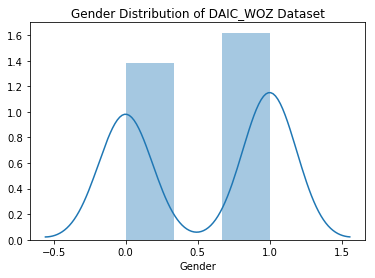

In [17]:
sns.distplot(df['Gender'])
plt.title('Gender Distribution of DAIC_WOZ Dataset')
plt.show()

In [18]:
df.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender
0,300,0,2,1
1,301,0,3,1
2,302,0,4,1
3,303,0,0,0
4,304,0,6,0


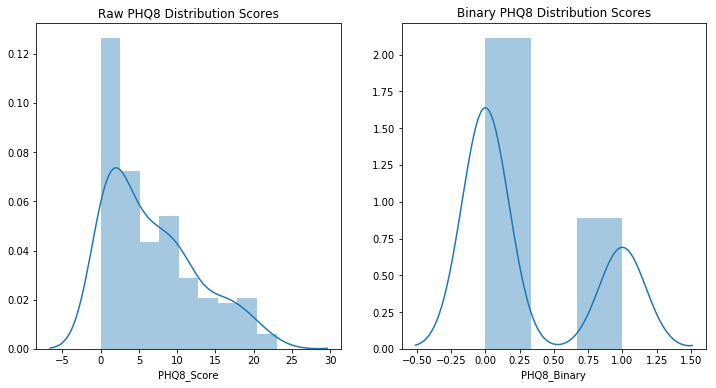

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(df['PHQ8_Score'], ax=ax[0])
ax[0].set_title('Raw PHQ8 Distribution Scores')

sns.distplot(df['PHQ8_Binary'], ax=ax[1])
ax[1].set_title('Binary PHQ8 Distribution Scores')

plt.show()

In [25]:
print(np.sum(df['PHQ8_Binary']==0))
print(np.sum(df['PHQ8_Binary']==1))

133
56


So our gender distribution is slightly skewed, but we are more interested in PHQ8 scores. As we can see, the DAIC_WOZ dataset is heavily skewed towards those who score lower on the PHQ8 scale. This could be due to how the binary scores were calculated, although it does seem from the plot on the left of the raw scores that most participants score lower on the PHQ8 scale. This almost 3-1 ratio will need to be taken into account when splitting the data for training. If we are not careful, the splits can miss the "true" distribution of the data, and our models will be biased. In this case, it will be best to use the StratifiedKFold method in scikit-learn when doing cross-validation.